# Window Operations Demo

Spark Streaming provides windowed computations, which allow you to apply transformations over a sliding window of data. The following figure illustrates this sliding window.

![Spark Streaming Data Flow](https://spark.apache.org/docs/latest/img/streaming-dstream-window.png)

As shown in the figure, every time the window slides over a source DStream, the source RDDs that fall within the window are combined and operated upon to produce the RDDs of the windowed DStream. In this specific case, the operation is applied over the last 3 time units of data, and slides by 2 time units. This shows that any window operation needs to specify two parameters

* window length - The duration of the window (3 in the figure).
* sliding interval - The interval at which the window operation is performed (2 in the figure).

These two parameters must be multiples of the batch interval of the source DStream (1 in the figure).
<p>
Some of the common window operations are as follows. All of these operations take the said two parameters - windowLength and slideInterval.


| Transformation        | Meaning           |
| -------------:|:-------------|
| **window**(windowLength, slideInterval)      | Return a new DStream which is computed based on windowed batches of the source DStream. |
| **countByWindow**(windowLength, slideInterval)     | Return a sliding window count of elements in the stream.     |
| **reduceByWindow**(func, windowLength, slideInterval) | Return a new single-element stream, created by aggregating elements in the stream over a sliding interval using func. The function should be associative and commutative so that it can be computed correctly in parallel.     |
| **reduceByKeyAndWindow**(func, windowLength, slideInterval, [numTasks])     | When called on a DStream of (K, V) pairs, returns a new DStream of (K, V) pairs where the values for each key are aggregated using the given reduce function func over batches in a sliding window. Note: By default, this uses Spark's default number of parallel tasks (2 for local mode, and in cluster mode the number is determined by the config property spark.default.parallelism) to do the grouping. You can pass an optional numTasks argument to set a different number of tasks. |
| **reduceByKeyAndWindow**(func, invFunc, windowLength, slideInterval, [numTasks])      | A more efficient version of the above reduceByKeyAndWindow() where the reduce value of each window is calculated incrementally using the reduce values of the previous window. This is done by reducing the new data that enters the sliding window, and “inverse reducing” the old data that leaves the window. An example would be that of “adding” and “subtracting” counts of keys as the window slides. However, it is applicable only to “invertible reduce functions”, that is, those reduce functions which have a corresponding “inverse reduce” function (taken as parameter invFunc). Like in reduceByKeyAndWindow, the number of reduce tasks is configurable through an optional argument. Note that checkpointing must be enabled for using this operation.      |
| **countByValueAndWindow**(windowLength, slideInterval, [numTasks]) | When called on a DStream of (K, V) pairs, returns a new DStream of (K, Long) pairs where the value of each key is its frequency within a sliding window. Like in reduceByKeyAndWindow, the number of reduce tasks is configurable through an optional argument.      |

### Demo

In [1]:
import findspark
# TODO: your path will likely not have 'matthew' in it. Change it to reflect your path.
findspark.init('/home/matthew/spark-2.1.0-bin-hadoop2.7')

In [2]:
from pyspark import SparkContext
from pyspark.streaming import StreamingContext

In [3]:
sc = SparkContext(master="local[2]", appName="WindowWordcount")
ssc = StreamingContext(sc, 1)
ssc.checkpoint("checkpoint")

In [4]:
lines = ssc.socketTextStream("localhost", 5555)

In [5]:
words = lines.flatMap(lambda line: line.split(" "))
pairs = words.map(lambda word: (word, 1))
pairs.window(30, 10).pprint()

In [ ]:
# You need to type the text from command promt 

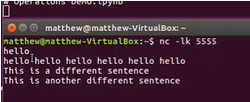

In [6]:
ssc.start()

-------------------------------------------
Time: 2018-02-08 22:52:53
-------------------------------------------

-------------------------------------------
Time: 2018-02-08 22:53:03
-------------------------------------------
('hello', 1)

-------------------------------------------
Time: 2018-02-08 22:53:13
-------------------------------------------
('hello', 1)
('hello', 1)
('hello', 1)
('hello', 1)
('hello', 1)
('hello', 1)
('hello', 1)

-------------------------------------------
Time: 2018-02-08 22:53:23
-------------------------------------------
('hello', 1)
('hello', 1)
('hello', 1)
('hello', 1)
('hello', 1)
('hello', 1)
('hello', 1)
('This', 1)
('is', 1)
('a', 1)
...

-------------------------------------------
Time: 2018-02-08 22:53:33
-------------------------------------------
('hello', 1)
('hello', 1)
('hello', 1)
('hello', 1)
('hello', 1)
('hello', 1)
('This', 1)
('is', 1)
('a', 1)
('different', 1)
...

-------------------------------------------
Time: 2018-02-08 22:5

In [7]:
ssc.stop(stopSparkContext=True, stopGraceFully=True)

## References
1. https://spark.apache.org/docs/latest/streaming-programming-guide.html#window-operations